In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import random
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

print('start')
#data = pd.read_csv("dataset_in_seconds.csv")

Using TensorFlow backend.


start


In [2]:
data = pd.read_csv("dataset_in_seconds2.csv")

In [3]:
data.head()

,Unnamed: 0,traffic
0,0,758.413197
1,1,758.413197
2,2,758.413197
3,3,758.413197
4,4,758.413197


1658.5744448125


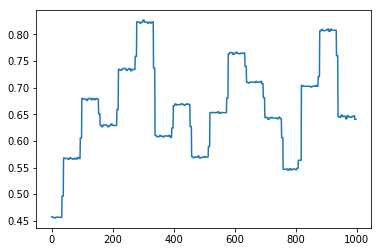

In [4]:
probes = data['traffic'].values

max_scale_value = max(probes)
print(max_scale_value)
probes /=max_scale_value
train_probes = probes[0:-2000]
test_probes = probes[-2000:]

plt.plot(probes[1:1000])


In [5]:
range_size = 30
range_size_in = 200


for i in range(range_size):
    if i == 0:
        Y_train_complete =  np.array(train_probes[range_size_in+range_size+1:])
        Y_test_complete  =  np.array(test_probes[range_size_in+range_size+1:])
        
    elif i ==1: 
        Y_train_complete = np.array([Y_train_complete[:], train_probes[range_size_in+range_size-i:-i-1]])
        Y_test_complete = np.array([Y_test_complete[:], test_probes[range_size_in+range_size-i:-i-1]])
    else:
        Y_train_complete = np.append(Y_train_complete, [train_probes[range_size_in+range_size-i:-i-1]], axis=0)
        Y_test_complete = np.append(Y_test_complete, [test_probes[range_size_in+range_size-i:-i-1]], axis=0)
        
for i in range(range_size_in):
    if i == 0:
        X_train_complete  =  np.array(train_probes[range_size_in:-1-range_size])
        X_test_complete  =  np.array(test_probes[range_size_in:-1-range_size])

    elif i ==1:
        X_train_complete = np.array([X_train_complete[:], train_probes[range_size_in-i:-i-1-range_size]])
        X_test_complete = np.array([X_test_complete[:], test_probes[range_size_in-i:-i-1-range_size]])
    else:
        X_train_complete = np.append(X_train_complete, [train_probes[range_size_in-i:-i-1-range_size]], axis=0)
        X_test_complete = np.append(X_test_complete, [test_probes[range_size_in-i:-i-1-range_size]], axis=0)
    
for i in range(range_size_in):
    if i == 0:
        cross_X_values_train = np.gradient(train_probes[range_size_in:-1-range_size])
        cross_X_values_test = np.gradient(test_probes[range_size_in:-1-range_size])
        max_grad = max(cross_X_values_train)
        cross_X_values_train /=max_grad
        max_grad = max(cross_X_values_test)
        cross_X_values_test /=max_grad
        
        
        X_train_complete = np.append(X_train_complete, [cross_X_values_train[:]], axis=0)
        X_test_complete = np.append(X_test_complete, [cross_X_values_test[:]], axis=0)

    elif i ==1:
        cross_X_values_train = np.gradient(train_probes[range_size_in-i:-i-1-range_size])
        cross_X_values_test = np.gradient(test_probes[range_size_in-i:-i-1-range_size])
        max_grad = max(cross_X_values_train)
        cross_X_values_train /=max_grad
        max_grad = max(cross_X_values_test)
        cross_X_values_test /=max_grad
        
        X_train_complete = np.append(X_train_complete, [cross_X_values_train[:]], axis=0)
        X_test_complete = np.append(X_test_complete, [cross_X_values_test[:]], axis=0)
        
    else:
        cross_X_values_train = np.gradient(train_probes[range_size_in-i:-i-1-range_size])
        cross_X_values_test = np.gradient(test_probes[range_size_in-i:-i-1-range_size])
        max_grad = max(cross_X_values_train)
        cross_X_values_train /=max_grad
        max_grad = max(cross_X_values_test)
        cross_X_values_test /=max_grad
        
        X_train_complete = np.append(X_train_complete, [cross_X_values_train[:]], axis=0)
        X_test_complete = np.append(X_test_complete, [cross_X_values_test[:]], axis=0)
        
Y_train_complete = np.flip(Y_train_complete,0)
Y_test_complete = np.flip(Y_test_complete,0)
X_train_complete = np.flip(X_train_complete,0)
X_test_complete = np.flip(X_test_complete,0)

In [6]:
print(np.shape(X_train_complete))
print(np.shape(Y_train_complete))
print(np.shape(X_test_complete))
print(np.shape(Y_test_complete))

(400, 84169)
(30, 84169)
(400, 1769)
(30, 1769)


In [7]:
print(Y_train_complete[0])

[0.6289763  0.6289763  0.6289763  ... 0.67266429 0.67266429 0.67266429]


In [8]:
X_train_complete = np.swapaxes(X_train_complete, 1, 0)
X_test_complete = np.swapaxes(X_test_complete, 1, 0)
Y_train_complete = np.swapaxes(Y_train_complete, 1, 0)
Y_test_complete = np.swapaxes(Y_test_complete, 1, 0)

print(Y_train_complete[0])


[0.6289763  0.6289763  0.6289763  0.6289763  0.62910262 0.62910262
 0.62910262 0.62910262 0.62910262 0.62910049 0.62910049 0.62910049
 0.62910049 0.62910049 0.65886141 0.65886141 0.65886141 0.65886141
 0.65886141 0.73445839 0.73445839 0.73445839 0.73445839 0.73445839
 0.73281361 0.73281361 0.73281361 0.73281361 0.73281361 0.73407308]


In [61]:

"""new_Y_train = np.zeros((np.shape(Y_train_complete)[0],int(range_size/5)))
for j in range(np.shape(Y_train_complete)[0]):
    for i in range(int(range_size/5)):
        new_Y_train[j][i] = np.mean(Y_train_complete[j][i*5:5*(i+1)])
        
new_Y_test = np.zeros((np.shape(Y_test_complete)[0],int(range_size/5)))
for j in range(np.shape(Y_test_complete)[0]):
    for i in range(int(range_size/5)):
        new_Y_test[j][i] = np.mean(Y_test_complete[j][i*5:5*(i+1)])
print(new_Y_train)
print(new_Y_test)"""

[[0.62900157 0.62910219 0.63505268 ... 0.73281102 0.73463572 0.73503781]
 [0.62902683 0.62910177 0.64100486 ... 0.73319144 0.73493872 0.73422789]
 [0.62905209 0.62910134 0.64695704 ... 0.73357186 0.73524173 0.73341797]
 ...
 [0.67321664 0.67106518 0.66990051 ... 0.51650388 0.51782    0.51852922]
 [0.67324184 0.66995166 0.67098846 ... 0.51680782 0.51802215 0.51858061]
 [0.67326704 0.66883813 0.67207642 ... 0.51711177 0.51822429 0.518632  ]]
[[0.56928344 0.5670031  0.56981331 ... 0.60227951 0.60293737 0.60174929]
 [0.56847281 0.5679653  0.5687747  ... 0.60255782 0.60248202 0.60238262]
 [0.56766217 0.56892751 0.5677361  ... 0.60283612 0.60202667 0.60301594]
 ...
 [0.51748949 0.51776833 0.51756737 ... 0.4558228  0.45642977 0.45642937]
 [0.51771719 0.5175662  0.51777009 ... 0.45592403 0.4565814  0.45620171]
 [0.51794489 0.51736407 0.5179728  ... 0.45602526 0.45673304 0.45597405]]


In [9]:
print("data ready - creating the model")

from keras.layers import Dropout
from keras.constraints import maxnorm
try:
    del model
except:
    pass
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=range_size_in*2, kernel_initializer='random_uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(range_size_in, kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(range_size_in, kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(range_size_in, kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#model.save('SDN_model_30min.h5')

data ready - creating the model


In [11]:
print(np.shape(Y_train_complete[:,0]))
try:
    del model
except:
    pass

list = []
for i in range(int(range_size/5)):
    try:
        del model
    except:
        pass
    model = wider_model()
    print("train model" + str(5*i))
    history = model.fit(X_train_complete, Y_train_complete[:,5*i], epochs=4, batch_size=1500, verbose=0)
    list.append(model)

#history = model.fit(X_train_complete, Y_train_complete, epochs=5, batch_size=1500, verbose=1)
print("save model")

(84169,)
train model
Epoch 1/5
84169/84169 [==============================] - 5s 58us/step - loss: 0.0302
Epoch 2/5
84169/84169 [==============================] - 4s 52us/step - loss: 0.0091
Epoch 3/5
84169/84169 [==============================] - 4s 50us/step - loss: 0.0071
Epoch 4/5
84169/84169 [==============================] - 5s 54us/step - loss: 0.0057
Epoch 5/5
84169/84169 [==============================] - 5s 55us/step - loss: 0.0053
train model
Epoch 1/5
84169/84169 [==============================] - 6s 68us/step - loss: 0.0284
Epoch 2/5
84169/84169 [==============================] - 4s 51us/step - loss: 0.0091
Epoch 3/5
84169/84169 [==============================] - 4s 49us/step - loss: 0.0074
Epoch 4/5
84169/84169 [==============================] - 5s 65us/step - loss: 0.0060
Epoch 5/5
84169/84169 [==============================] - 5s 57us/step - loss: 0.0054
train model
Epoch 1/5
84169/84169 [==============================] - 6s 67us/step - loss: 0.0304
Epoch 2/5
84169/8416

In [35]:
print("train prediction:")
predictions0 = list[0].predict(X_train_complete[0:1739], batch_size=1000)
predictions1 = list[1].predict(X_train_complete[0:1739], batch_size=1000)
predictions2 = list[2].predict(X_train_complete[0:1739], batch_size=1000)
predictions3 = list[3].predict(X_train_complete[0:1739], batch_size=1000)
predictions4 = list[4].predict(X_train_complete[0:1739], batch_size=1000)
predictions5 = list[5].predict(X_train_complete[0:1739], batch_size=1000)

pred_list = [predictions0,predictions1,predictions2,predictions3,predictions4,predictions5]

train prediction:


In [43]:
#interpolate data predicted
xin = [0, 5, 10,15,20,25]
xout = [0,1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
xin2 = [0, 5]
xout2 = [0,1, 2, 3, 4,5,6,7,8,9]

def interpolate_pred(pred_list):
    predictions = np.concatenate((pred_list[0], pred_list[1],pred_list[2],pred_list[3],pred_list[4],pred_list[5]), axis = 1)
    pred_interpolated = np.zeros((np.shape(predictions)[0],np.shape(predictions)[1]*5))
    for i in range(np.shape(predictions)[0]):
        pred_interpolated[i] = np.interp(xout, xin, predictions[i])
    return pred_interpolated
    
def interpolate_pred_2(pred_item,pred_item2):
    predictions = np.concatenate((pred_item,pred_item2), axis = 1)
    pred_interpolated = np.zeros((np.shape(predictions)[0],np.shape(predictions)[1]*5))
    for i in range(np.shape(predictions)[0]):
        pred_interpolated[i] = np.interp(xout2, xin2, predictions[i])
    return pred_interpolated
interpolate_pred(pred_list)


print(np.shape(pred_interpolated))


(1739, 30)


In [45]:
predictions0 = list[0].predict(X_test_complete, batch_size=1000)
predictions1 = list[1].predict(X_test_complete, batch_size=1000)

predictions_temp = interpolate_pred_2(predictions0,predictions1)
X_test_complete_temp = X_test_complete
print(np.shape(X_test_complete))

(1769, 400)


test pred
(1769, 400)
1658.5744448125
(1769, 30)
(1769, 30)
125.28158326109617


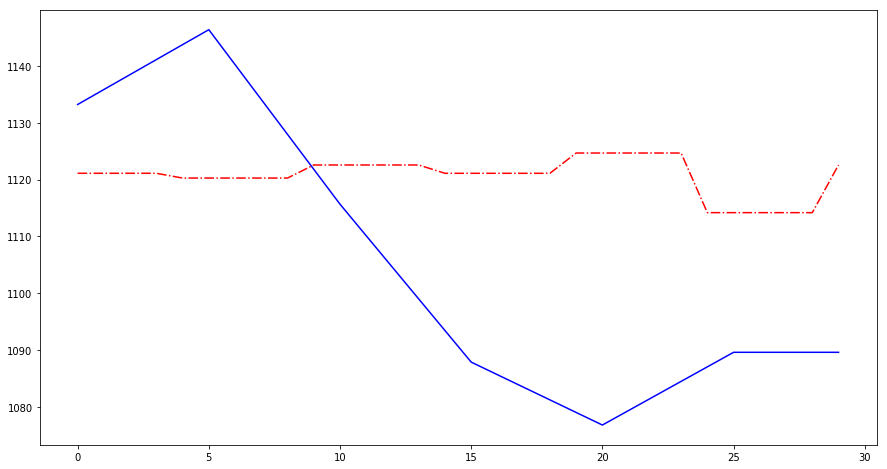

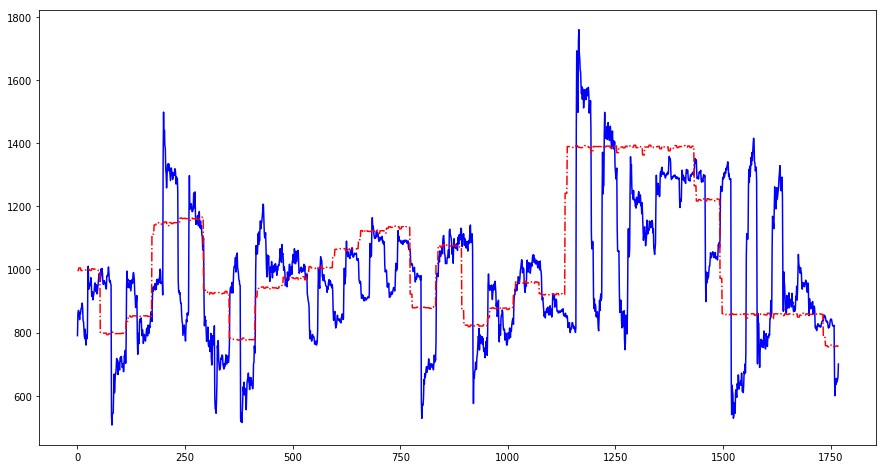

In [49]:
print("test pred")
predictions0 = list[0].predict(X_test_complete, batch_size=1000)
predictions1 = list[1].predict(X_test_complete, batch_size=1000)
predictions2 = list[2].predict(X_test_complete, batch_size=1000)
predictions3 = list[3].predict(X_test_complete, batch_size=1000)
predictions4 = list[4].predict(X_test_complete, batch_size=1000)
predictions5 = list[5].predict(X_test_complete, batch_size=1000)

pred_list_test = [predictions0,predictions1,predictions2,predictions3,predictions4,predictions5]
predictions = interpolate_pred(pred_list_test)
"""predictions = model.predict(X_test_complete, batch_size=1000)"""

print(np.shape(X_test_complete))
no_scale_predictions = predictions * max_scale_value
print(max_scale_value)
no_scale_new_Y_test = Y_test_complete  * max_scale_value

print(np.shape(no_scale_predictions))
print(np.shape(no_scale_new_Y_test))
print(sum(sum(abs(no_scale_predictions - no_scale_new_Y_test)))/(np.shape(no_scale_new_Y_test)[0]*np.shape(no_scale_new_Y_test)[1]))

#np.savetxt("no_scale_new_Y_test.csv", no_scale_new_Y_test, delimiter=",")
#np.savetxt("no_scale_predictions.csv", no_scale_predictions, delimiter=",")



plt.figure(figsize=(15,8))
plt.plot(no_scale_predictions[700], 'b')
plt.plot(no_scale_new_Y_test[700], 'r-.')

fl_no_scale_predictions = np.swapaxes(no_scale_predictions, 1, 0)
fl_no_scale_new_Y_test = np.swapaxes(no_scale_new_Y_test, 1, 0)

plt.figure(figsize=(15,8))
plt.plot(fl_no_scale_predictions[26], 'b')
plt.plot(fl_no_scale_new_Y_test[26], 'r-.')

